In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from matplotlib.colors import ListedColormap

# Завантаження даних
df = pd.read_csv("iris.csv")


In [15]:
df = df.drop(columns=["Id"])

df["Species"] = df["Species"].astype("category").cat.codes

X = df.drop(columns=["Species"])
y = df["Species"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)


In [17]:
k_values = range(1, 21)
accuracies = []
mae_values = []
mse_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    accuracies.append(acc)
    mae_values.append(mae)
    mse_values.append(mse)
    print(f"k = {k}, accuracy = {acc}, MAE = {mae}, MSE = {mse}")



k = 1, accuracy = 0.9185185185185185, MAE = 0.08148148148148149, MSE = 0.08148148148148149
k = 2, accuracy = 0.8592592592592593, MAE = 0.14074074074074075, MSE = 0.14074074074074075
k = 3, accuracy = 0.9555555555555556, MAE = 0.044444444444444446, MSE = 0.044444444444444446
k = 4, accuracy = 0.9333333333333333, MAE = 0.06666666666666667, MSE = 0.06666666666666667
k = 5, accuracy = 0.9703703703703703, MAE = 0.02962962962962963, MSE = 0.02962962962962963
k = 6, accuracy = 0.9407407407407408, MAE = 0.05925925925925926, MSE = 0.05925925925925926
k = 7, accuracy = 0.9555555555555556, MAE = 0.044444444444444446, MSE = 0.044444444444444446
k = 8, accuracy = 0.8592592592592593, MAE = 0.14074074074074075, MSE = 0.14074074074074075
k = 9, accuracy = 0.8888888888888888, MAE = 0.1111111111111111, MSE = 0.1111111111111111
k = 10, accuracy = 0.6666666666666666, MAE = 0.3333333333333333, MSE = 0.3333333333333333
k = 11, accuracy = 0.6666666666666666, MAE = 0.3333333333333333, MSE = 0.3333333333333333

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 16, n_samples_fit = 15, n_samples = 135

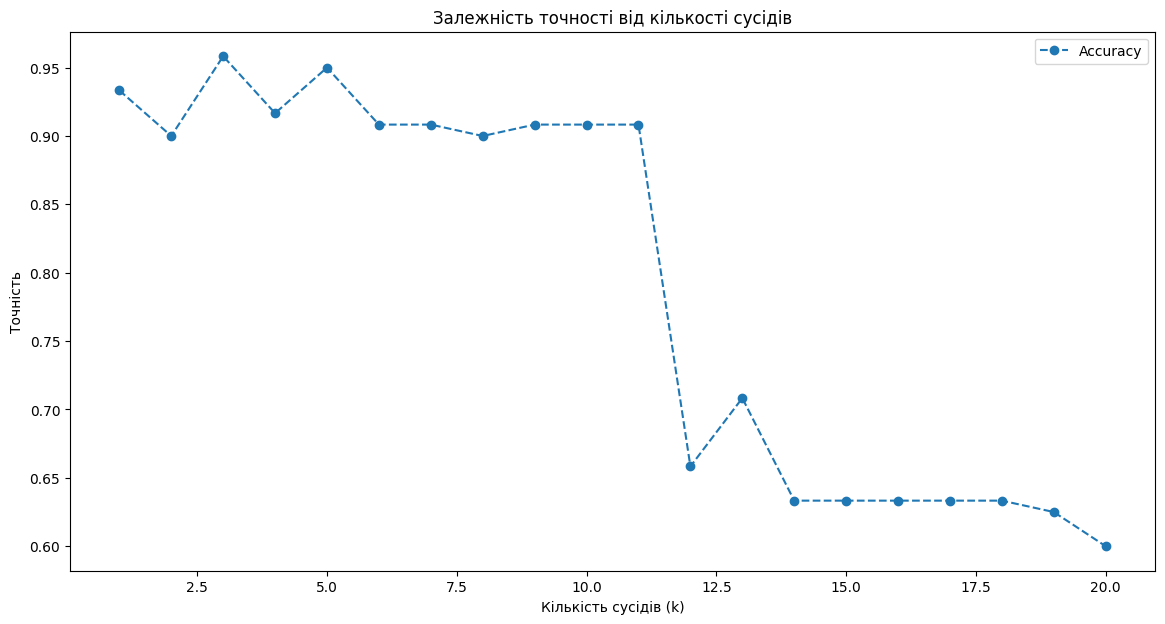

Найкраще значення k: 3
Точність: 0.9583
MAE: 0.0417
MSE: 0.0417


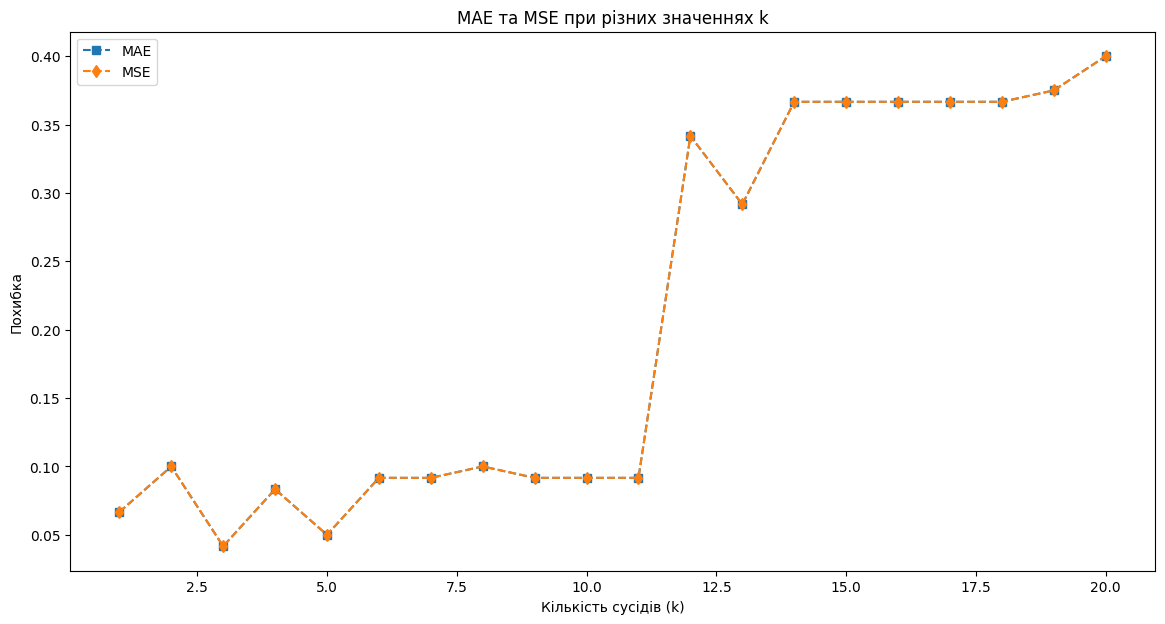

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', label='Accuracy')
plt.xlabel('Кількість сусідів (k)')
plt.ylabel('Точність')
plt.title('Залежність точності від кількості сусідів')
plt.legend()
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f'Найкраще значення k: {best_k}')

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_best_pred = knn_best.predict(X_test)

best_accuracy = accuracy_score(y_test, y_best_pred)
best_mae = mean_absolute_error(y_test, y_best_pred)
best_mse = mean_squared_error(y_test, y_best_pred)
print(f'Точність: {best_accuracy:.4f}')
print(f'MAE: {best_mae:.4f}')
print(f'MSE: {best_mse:.4f}')

plt.figure(figsize=(14, 7))
plt.plot(k_values, mae_values, marker='s', linestyle='dashed', label='MAE')
plt.plot(k_values, mse_values, marker='d', linestyle='dashed', label='MSE')
plt.xlabel('Кількість сусідів (k)')
plt.ylabel('Похибка')
plt.title('MAE та MSE при різних значеннях k')
plt.legend()
plt.show()



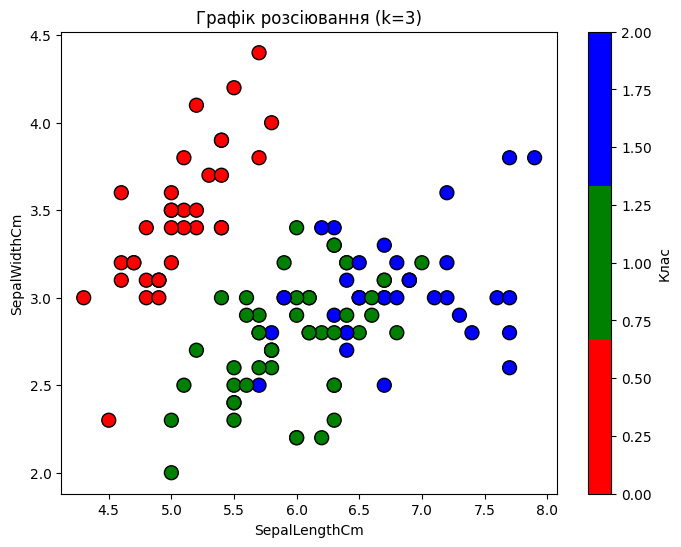

In [ ]:
plt.figure(figsize=(8, 6))
cmap = ListedColormap(['red', 'green', 'blue'])
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_best_pred, cmap=cmap, edgecolor='k', s=100, marker='o')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title(f'Графік розсіювання (k={best_k})')
plt.colorbar(label='Клас')
plt.show()
